In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
#读取数据，切分 训练集:验证集 = 2:1
data = load_svmlight_file("Housing")
X_train, X_test, y_train, y_test = train_test_split(data[0].todense(), data[1], test_size=0.33, random_state=42)

In [3]:
#加一维，全置为1
X_train = np.c_[X_train, np.ones(X_train.shape[0])]
X_test = np.c_[X_test, np.ones(X_test.shape[0])]

In [4]:
rate = 0.1                       #步长
iter = 100                       #迭代次数
dimension = X_train.shape[1]     #维度数

In [5]:
#w = np.zeros(dimension)                      #全零初始化
w = np.random.normal(size = (dimension))      #正态分布初始化
G = np.zeros(dimension)                       #梯度
deviation_array = np.zeros(X_train.shape[0])  #计算L2 loss用，存放label与预测值的差

In [6]:
#计算loss 进行梯度下降更新
def linear_regression (X_train,y_train,X_test,y_test,w):   #L2 loss
    train_loss = np.zeros(iter)        #初始化 存放训练集loss的向量
    validation_loss = np.zeros(iter)   #初始化 存放验证集loss的向量
    for i in range(iter):  #迭代iter次停止
        #trainLoss
        deviation_train = y_train.reshape(y_train.shape[0],1) - np.dot(X_train, w.reshape(dimension,1))   #存放label与预测值的差
        for j in range(deviation_train.shape[0]):                      #求和所有记录的差的平方
            train_loss[i] = train_loss[i] + deviation_train[j] ** 2
        train_loss[i] = train_loss[i] / deviation_train.shape[0] / 2   #取平均再除以2 
        #validationLoss
        deviation_test = y_test.reshape(y_test.shape[0],1) - np.dot(X_test, w.reshape(dimension,1))    #存放label与预测值的差
        for j in range(deviation_test.shape[0]):                                #求和所有记录的差的平方
            validation_loss[i] = validation_loss[i] + deviation_test[j] ** 2
        validation_loss[i] = validation_loss[i] / deviation_test.shape[0] / 2   #取平均再除以2 
        #gradient descent
        G = -np.dot(deviation_train.reshape(1,deviation_train.shape[0]), X_train / X_train.shape[0])    #求梯度G
        w = w - rate * G              #更新w
    return train_loss,validation_loss       #返回训练集loss和验证集loss

In [7]:
#调用函数
L_train, L_validation = linear_regression(X_train, y_train,X_test,y_test,w)

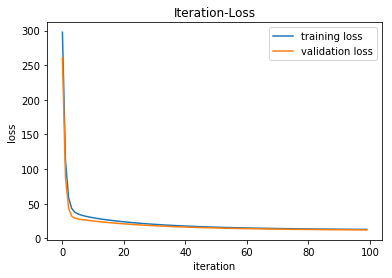

In [9]:
#loss图像
x = np.arange(iter)

plt.plot(x, L_train.tolist(), label='training loss')
plt.plot(x, L_validation.tolist(), label='validation loss')

plt.xlabel('iteration')
plt.ylabel('loss')

plt.title('Iteration-Loss')

plt.legend()

plt.show()